**Kêt nối drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Import dữ liệu**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data/images.csv')
Y = pd.read_csv('/content/drive/MyDrive/data/labels.csv')

In [ ]:
#Thử lại data 
import numpy as np
from google.colab.patches import cv2_imshow
data=np.array(data)

**Chia dữ liệu train 80%, test 20%**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, np.array(Y), test_size=0.2)
y_train=y_train.ravel()

**Reshape và one-hot-encode dữ liệu**



In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y_train= label_encoder.fit_transform(y_train) 
y_test = label_encoder.fit_transform(y_test) 

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


# one-hot encoding using keras' numpy-related utilities
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

**Cấu hình cho thuật toán CNN (4 lớp)**

In [ ]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(150, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(175, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.4))
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
# hidden layer
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


**Bắt đầu train**

In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
412/412 [==============================] - 711s 2s/step - loss: 0.9042 - accuracy: 0.7116 - val_loss: 0.5097 - val_accuracy: 0.8373
Epoch 2/10
412/412 [==============================] - 713s 2s/step - loss: 0.4615 - accuracy: 0.8519 - val_loss: 0.3545 - val_accuracy: 0.8911
Epoch 3/10
412/412 [==============================] - 712s 2s/step - loss: 0.3691 - accuracy: 0.8876 - val_loss: 0.2885 - val_accuracy: 0.9113
Epoch 4/10
412/412 [==============================] - 710s 2s/step - loss: 0.3169 - accuracy: 0.9047 - val_loss: 0.2712 - val_accuracy: 0.9170
Epoch 5/10
412/412 [==============================] - 710s 2s/step - loss: 0.2875 - accuracy: 0.9132 - val_loss: 0.2379 - val_accuracy: 0.9246
Epoch 6/10
412/412 [==============================] - 712s 2s/step - loss: 0.2580 - accuracy: 0.9230 - val_loss: 0.2596 - val_accuracy: 0.9231
Epoch 7/10
412/412 [==============================] - 712s 2s/step - loss: 0.2587 - accuracy: 0.9229 - val_loss: 0.2076 - val_accuracy: 0.9428

**Lưu lại model**

In [ ]:
print(model)
model.save("/content/drive/MyDrive/models3/my_model")

**Sử dụng lại model**

In [ ]:
import keras
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/models3/my_model")

In [ ]:
y_pred = reconstructed_model.predict(X_test)

**Làm tròn kết quả để tiện cho việc đánh giá**

In [ ]:
import numpy as np

y_pred_rounded = np.argmax(y_pred, axis=1)
Y_test_rounded = np.argmax(Y_test, axis=1)

**Confusion matrix**

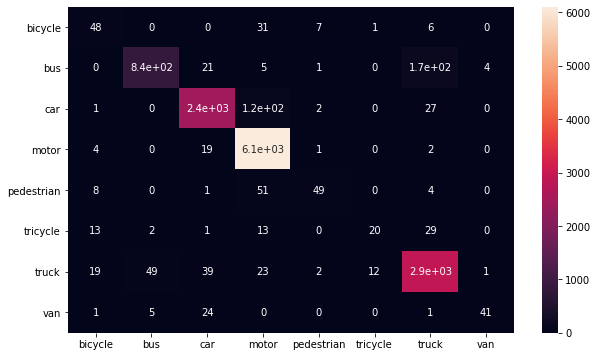

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm =confusion_matrix(Y_test_rounded, y_pred_rounded)  
index = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
columns = ['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)


**Tính độ chính xác precision, recall, fscore**



In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(Y_test_rounded, y_pred_rounded)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.51898734 0.95154185 0.96580868 0.96766672 0.87272727 0.6
 0.9375626  0.94545455]
recall: [0.46067416 0.84210526 0.95844453 0.99711677 0.44859813 0.3
 0.96164384 0.61176471]
fscore: [0.48809524 0.89348501 0.96211251 0.98217103 0.59259259 0.4
 0.94945055 0.74285714]
support: [  89 1026 2623 6243  107   70 2920   85]


**Vẽ biểu đồ độ đo AP**

Average precision score, micro-averaged over all classes: 0.99


Text(0.5, 1.0, 'CNN micro-averaged over all classes: AP=0.99')

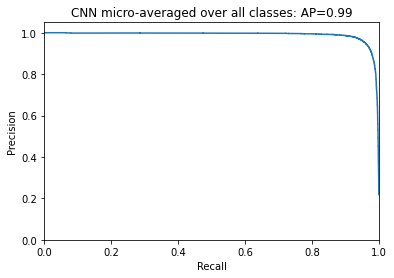

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
n_classes = 8  #['bicycle', 'bus', 'car', 'motor', 'pedestrian', 'tricycle', 'truck', 'van']

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[i], y_pred[i])
    average_precision[i] = average_precision_score(Y_test[i], y_pred[i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

# Draw 
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('CNN micro-averaged over all classes: AP={:0.2f}'.format(average_precision["micro"]))